# Plotando os limites de decisões e comparando kernels

A ideia desse notebook é mostrar como podemos observar os limites de decisão de classificadores SVMs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Definição de defaults

In [2]:
plt.rcParams['figure.dpi'] = 140
plt.rcParams['figure.figsize'] = (10, 8)
for spine in ['left', 'top', 'right', 'bottom']:
    plt.rcParams[f'axes.spines.{spine}'] = False

## Inputs

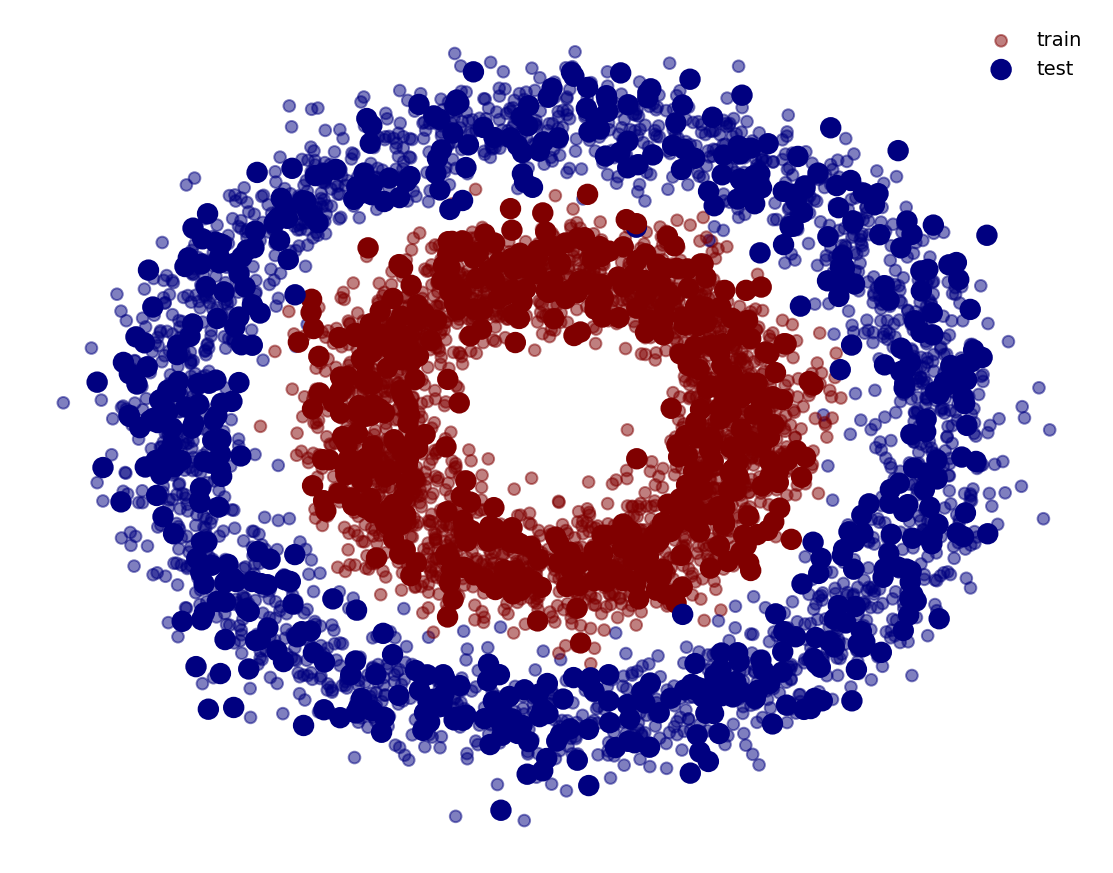

In [3]:
X, y = make_circles(n_samples=5000, noise=.1, factor=.5, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

fig, ax = plt.subplots()

ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.5, cmap='jet', label='train')
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet', label='test')
plt.yticks([])
plt.xticks([])
plt.legend(frameon=False);

## Treinamento SVM

In [4]:
svc_poly = SVC(kernel='poly', random_state=42)
svc_poly.fit(x_train, y_train)
print(f'SVC polynomial score: {svc_poly.score(x_test, y_test):.2f}')

svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(x_train, y_train)
print(f'SVC RBF (Radial Basis Function) score: {svc_rbf.score(x_test, y_test):.2f}')

SVC polynomial score: 0.59
SVC RBF (Radial Basis Function) score: 0.99


## Definição dos planos 2D

In [5]:
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

XX = np.arange(x_min, x_max, .01)
YY = np.arange(y_min, y_max, .01)
xx, yy = np.meshgrid(XX, YY)

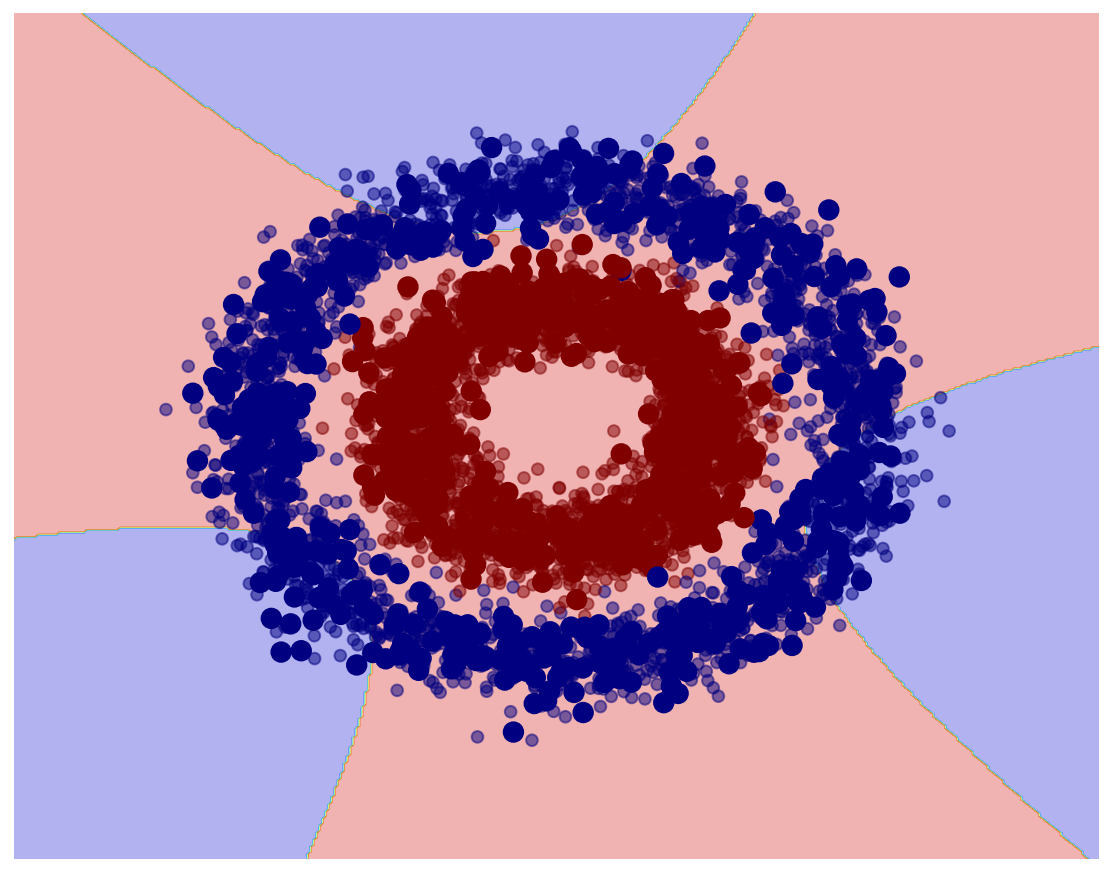

In [6]:
fig, ax = plt.subplots()
ZZ = svc_poly.predict(np.c_[xx.ravel(), yy.ravel()])
zz = ZZ.reshape(xx.shape)

ax.contourf(xx, yy, zz, cmap='jet', alpha=.3)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.5, cmap='jet')
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet')

ax.set_xticks([])
ax.set_yticks([]);

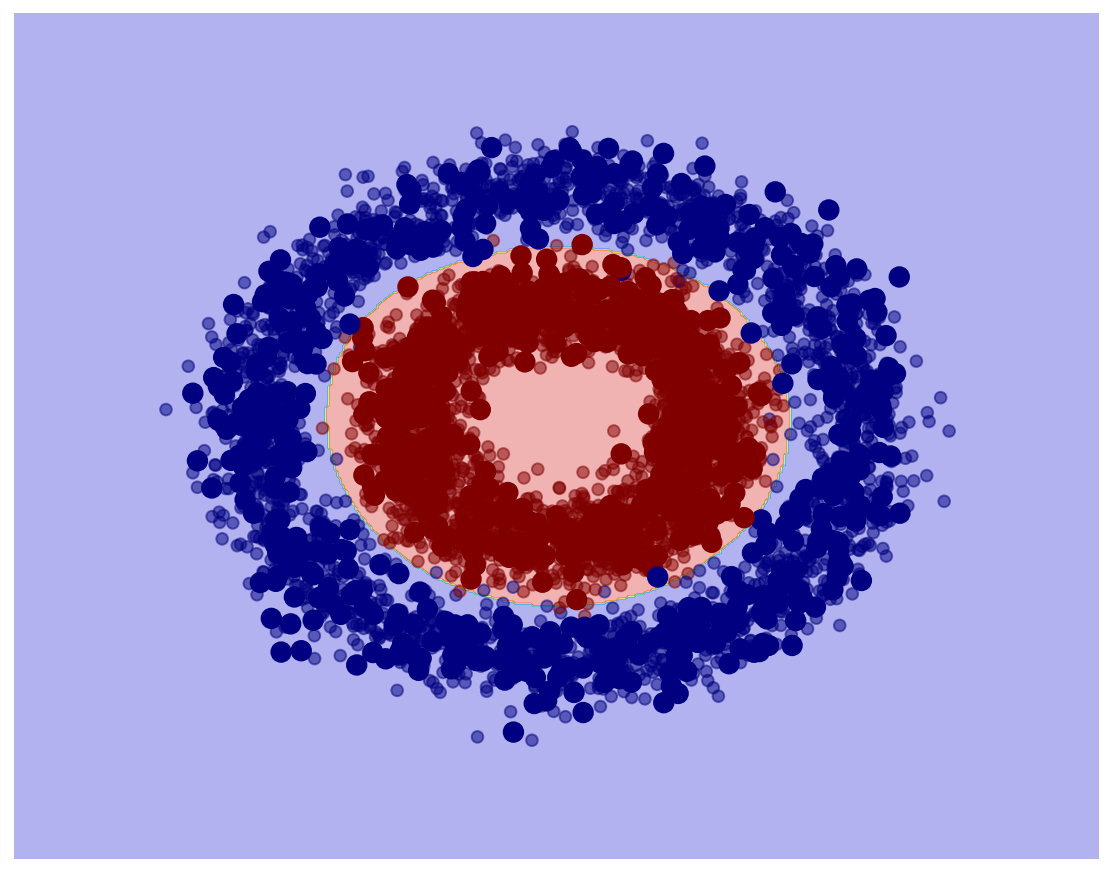

In [7]:
fig, ax = plt.subplots()
ZZ = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
zz = ZZ.reshape(xx.shape)

ax.contourf(xx, yy, zz, cmap='jet', alpha=.3)
ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, alpha=0.5, cmap='jet')
ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=100, cmap='jet')

ax.set_xticks([])
ax.set_yticks([]);